This dataset details drug overdose deaths in Connecticut from 2012 to 2018. It contains basic demographic features, such as race, age, and sex, in addition to substances present in system postmortem. The data on drugs is binary--0 for not present and 1 for present--and does not offer any further quantitative information. I chose this topic because of its importance. The ongoing exponential increase of overdose deaths has received substantial interest from researchers and public health officials, but this attention has done little to quell the rise in rates. My work here does not offer any novel solutions to a multifaceted, deeply ingrained problem; rather, I hope continued attention from data science and statistics can generate short-term and long-term solutions.

https://www.kaggle.com/ruchi798/drug-overdose-deaths

My research question is something like this: can we predict the presence of fentanyl in overdose deaths based on the presence of other substances at time of death? I don't know that answering this question will generate much change in policy or behavior. It will, however, offer some detail on the intersection of different drugs, including fentanyl, the primary culprit for the continuing surge of overdose deaths.

Since much of the data is binary, some statistical methods are off the table. Most obviously, linear regression will not work. I decided to use Naive Bayes because it's fairly straightforward, works for supervised learning, and I'm interested in how the titular naive assumption of independence between features works on data with some connections. For instance, use of heroin correlates with fentanyl use moreso than use of methamphetamines. Does this throw Naive Bayes off any?

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt

In [2]:
drug_deaths = pd.read_csv("C://Users/stevj/Downloads/drug_deaths/drug_deaths.csv")

In [3]:
drug_deaths["Fentanyl"] = pd.to_numeric(drug_deaths["Fentanyl"], errors = 'coerce')

In [5]:
labelCode = preprocessing.LabelEncoder()

drug_deaths["Sex"] = labelCode.fit_transform(drug_deaths["Sex"])
drug_deaths["Race"] = labelCode.fit_transform(drug_deaths["Race"])

In [38]:
reduced = drug_deaths[["Heroin", "Age", "Sex", "Race","Cocaine", "Fentanyl_Analogue", "Fentanyl", 
                 "Oxycodone", "Oxymorphone", "Ethanol", "Benzodiazepine", 
                 "Methadone", "Amphet", "Tramad", "Hydromorphone"]].dropna()

The model will first use all the features, including demographic data and other drugs present.

In [39]:
X = reduced[["Heroin", "Age", "Sex", "Race", "Cocaine", "Fentanyl_Analogue",  
                 "Oxycodone", "Oxymorphone", "Ethanol", "Benzodiazepine", 
                 "Methadone", "Amphet", "Tramad", "Hydromorphone"]].values
y = reduced.loc[:, ["Fentanyl"]].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [42]:
classifer = BernoulliNB()
classifer.fit(X_train, y_train)
y_pred = classifer.predict(X_test)

C:\Users\stevj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Next, the model will use just the three demographic features.

In [46]:
X_demo = reduced[["Age", "Sex", "Race"]].values
y_demo = reduced.loc[:, ["Fentanyl"]].values

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_demo, y_demo, test_size = 0.20, random_state = 0)

In [48]:
sc_X = StandardScaler() 
X_train1 = sc_X.fit_transform(X_train1)
X_test1 = sc_X.fit_transform(X_test1)

In [49]:
classifer = BernoulliNB()
classifer.fit(X_train1, y_train1)
y_pred1 = classifer.predict(X_test1)

C:\Users\stevj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Next, the model will consider just the 5 most used drugs.

In [52]:
X_top5 = reduced[["Heroin", "Cocaine", "Ethanol", "Benzodiazepine", "Oxycodone"]].values
y_top5 = reduced.loc[:, ["Fentanyl"]].values

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top5, y_top5, test_size = 0.20, random_state = 0)

In [54]:
sc_X = StandardScaler() 
X_train2 = sc_X.fit_transform(X_train2)
X_test2 = sc_X.fit_transform(X_test2)

In [55]:
classifer = BernoulliNB()
classifer.fit(X_train2, y_train2)
y_pred2 = classifer.predict(X_test2)

C:\Users\stevj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
accuracy = accuracy_score(y_pred, y_test)
accuracy_demo = accuracy_score(y_pred1, y_test1)
accuracy_top5 = accuracy_score(y_pred2, y_test2)
print("Accuracy with all features is ", 100 * accuracy,"percent")
print("Accuracy with demographic features is ", 100 * accuracy_demo,"percent")
print("Accuracy with the five most used drugs is ", 100 * accuracy_demo,"percent")

Accuracy with all features is  64.31372549019608 percent
Accuracy with demographic features is  60.19607843137255 percent
Accuracy with the five most used drugs is  60.19607843137255 percent


In [57]:
rmse = sqrt(mean_squared_error(y_pred, y_test))
rmse_demo = sqrt(mean_squared_error(y_pred1, y_test1))
rmse_top5 = sqrt(mean_squared_error(y_pred2, y_test2))
print("Root mean squared error with all features is ", rmse)
print("Root mean squared error with demographic features is ", rmse_demo)
print("Root mean squared error with top 5 used drugs ", rmse_top5)

Root mean squared error with all features is  0.5973799001456604
Root mean squared error with demographic features is  0.6309034915787631
Root mean squared error with top 5 used drugs  0.6678910325588666


Turns out using all features works better than more specific feature selection. This makes sense; Naive Bayes works best the more data it processes. Unlike, say, k-nearest neighbors, there are no parameters to tinker with that drastically impact model performance.

<function matplotlib.pyplot.show(close=None, block=None)>

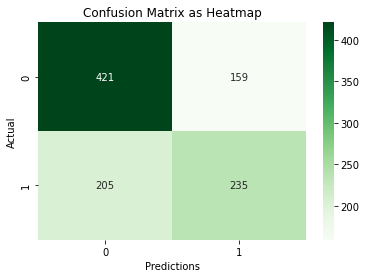

In [98]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="", cmap='Greens')
ax.set_title('Confusion Matrix as Heatmap')
ax.set_xlabel("Predictions")
ax.set_ylabel("Actual")
plt.show

The model mostly predicts overdose deaths will not have fentanyl, proving accurate in this forecast. Next, it succesfully predicts the presence of fentanyl. The model produces more false negatives than false positives, indicating more predicted negatives that were actually positives than vice versa.

I'm going to do some logisitic regression for comparison

In [58]:
logreg = LogisticRegression()

In [59]:
logreg.fit(X,y)

C:\Users\stevj\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\stevj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
logreg.intercept_
logreg.coef_

array([[-0.01821791,  0.45978152, -0.02537012,  4.71579106, -0.53057958,
        -1.21149367, -0.7563017 , -0.03293883, -0.07850925, -1.00427785,
         0.11612433, -0.21190532,  0.02352692]])

In [61]:
predictions = logreg.predict(X) 
predictions

array([1., 0., 1., ..., 1., 1., 0.])

In [62]:
logreg.score(X, y)

0.6939976461357396

In [85]:
rmse_logreg = sqrt(mean_squared_error(predictions, y))
rmse_logreg

0.5531747950370303

<function matplotlib.pyplot.show(close=None, block=None)>

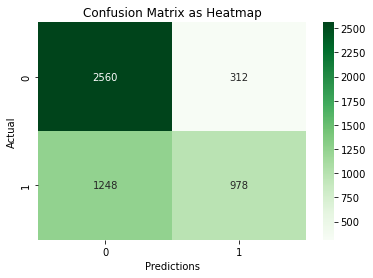

In [97]:
cm = confusion_matrix(y, predictions)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="", cmap='Greens')
ax.set_title('Confusion Matrix as Heatmap')
ax.set_xlabel("Predictions")
ax.set_ylabel("Actual")
plt.show

Multivariate logisitic regression beats the Naive Bayes model by a few percentage points. For some reason, it generates a lot more false negatives proportionally.

I don't know if Naive Bayes is the best model for this dataset. Decision trees and maybe even neural networks might get a better answer. Logisitic regression proved to be decent at making the predictions I was after. Some sort of aggregating model may be able to improve on logistic regression's predictions somewhat.

One disappointment of this dataset was the reduction of quantitative data to just 1s and 0s. I would be interested to find out if a higher amount of, say, heroin or cocaine in the bloodstream correlate with an increased probability for the presence of fentanyl. This dataset fails to facilitate such insight, but it was clean and easy to work with.

My model has two primary realworld benefits. First, it helps demonstrate the prevalence of fentanyl in fatal overdose cases. In recent years, this fact has only gotten worse. Second, my model shows, with decent accuracy, the drugs that correlate with the presence of fentanyl. In other words, there are patterns to fentanyl-linked overdose deaths that can and should be studied.

A major limitation of my model--really the dataset--is a lack of data about socioeconomic status. How do poor people use drugs differently than rich ones, and how does this impact overdose deaths? The second limitation of my model may be a limitation of models and data more generally. Specifically, models reduce human life to numbers in a way that is usefu, but imperfect. Saying "Fentanyl caused this person to die" elides struggling to comprehend the social factors that facilitate fatal drug use. Again, this is a problem with all models, and mine is no exception.

There are researchers doing interesting work about the opioid crisis, like modelling distribution networks and connecting overdose mortality to economic conditions and prescribed medications. One aspect that intrigues me is the link between mental health and drug abuse. Too often researchers can think in excessively binary terms--in this case, "mentally ill" or "not mentally ill"; a more nuanced approach to what constitutes mental welness might reveal some of the symptoms fuelling the overdose crisis.